Загрузка ... my_own_images/2828_my_own_3.png
min =  0.029411765
max =  0.6025402
[[0.00141218]
 [0.00515235]
 [0.01882304]
 [0.90009553]
 [0.00395424]
 [0.03758068]
 [0.00344631]
 [0.00509108]
 [0.00499942]
 [0.00095738]]
Сеть сказала  3


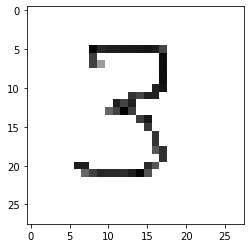

In [1]:
# Блокнот Puthon  для книги "Создаем нейронную сеть".
# Код для создания 3-слойной нейронной сети вместе с
# кодом для ее обучения с помощью набора данных MNIST.

# библиотека numpy
import numpy

# библиотека scipy.special содержит сигмоиду expit()
import scipy.special

# библиотека для графического отображения массивов
import matplotlib.pyplot
# гарантировать размещение графики в данном блокноте,
# а не в отдельном окне
%matplotlib inline

# поможет загрузить  данные из файла изображения PNG
import imageio

# опрееделение класса нейронной сети
class neuralNetwork:
    
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # задать количество узлов во входном, скрытом и выходном слое
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Матрицы весовых коэффициентов связей wih (между входным и скрытым)
        # слоями) и who (между скрытым и выходным слоями).
        # Весовые коэффициенты связей между узлом i и узлом j следующего слоя
        # обозначены как w_i_j:
        # w11 w21
        # w12 w22 и т.д.
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, - 0.5),\
                                       (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, - 0.5),\
                                       (self.onodes, self.hnodes))
        
        # коэффициент обучения
        self.lr = learningrate
        
        # Использование сигмоиды в качестве функции активации
        self.activation_function = lambda x: scipy.special.expit(x)
                  
        pass
    
    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # преобразовать список значений в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(targets_list, ndmin = 2).T
        
        # рассчитать входящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        # ошибка выходного слоя =
        #целевое значение - фактическое значение)
        output_errors = targets - final_outputs
        
        # ошибки скрытого слоя - это ошибки output_errors,
        # распределенные пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # обновить весовые коэффициенты связей между скрытым и выходным слоями
        self.who += self.lr * numpy.dot((output_errors * final_outputs * \
                    (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # обновить весовые коэффициенты связей между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * \
                    (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    
    # опрос нейронной сети
    def query(self, inputs_list):
        # преодразовать список входных значений
        # в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        

# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# коэффициент обучения равен 0,1
learning_rate = 0.1

# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


# загрузить в список тренировочный набор данных CSV-файла набора MNIST
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# тренирова нейронной сети

# переменная epochs указывает, сколько раз тренировочный
# набор данных используется для тренировки сети
epochs = 5

for e in range(epochs):
    # перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        # получить список значений, используя символы запятой (',')
        # в качестве разделителей
        all_values = record.split(',')
        # масштабировать и сместить входные значения
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0,01, за исключением
        # желаемого маркерного значения равного 0,99)
        targets = numpy.zeros(output_nodes) + 0.01
    
        # all_values[0] - целевое маркерное значение для данной записи
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

# загрузить в список тестовый набор данных CSV-файла набора MNIST
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# тестирование нейронной сети c нашим собственным изображением

# Загрузка данных изображения из png файла в массив
print("Загрузка ... my_own_images/2828_my_own_3.png")
img_array = imageio.imread('my_own_images/2828_my_own_3.png',\
                           as_gray = True)

# Преобразовать 28x28 в список из 784 значений, инвертировать значения
img_data = 255 - img_array.reshape(784)

# затем масштабируем данные в диапазон от 0,01 до 1,0
img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", numpy.min(img_data))
print("max = ", numpy.max(img_data))

# получаем изображение
matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap = 'Greys',\
                        interpolation = 'None')

# опрос сети
outputs = n.query(img_data)
print(outputs)

# индекс наибольшего значения соответствует метке
label = numpy.argmax(outputs)
print("Сеть сказала ", label)
